In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for index in sequence:
      if index < dimension:
        results[i, index] = 1
  return results


In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.6941 - loss: 0.6039 - val_accuracy: 0.8438 - val_loss: 0.4206
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8883 - loss: 0.3530 - val_accuracy: 0.8851 - val_loss: 0.3184
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9182 - loss: 0.2555 - val_accuracy: 0.8917 - val_loss: 0.2847
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9345 - loss: 0.2017 - val_accuracy: 0.8890 - val_loss: 0.2766
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9475 - loss: 0.1690 - val_accuracy: 0.8762 - val_loss: 0.3044
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9554 - loss: 0.1462 - val_accuracy: 0.8809 - val_loss: 0.3047
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9597 - loss: 0.1300 - val_accuracy: 0.8842 - val_loss: 0.2905
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9698 - loss: 0.1030 - val_accuracy: 0.8692 - v

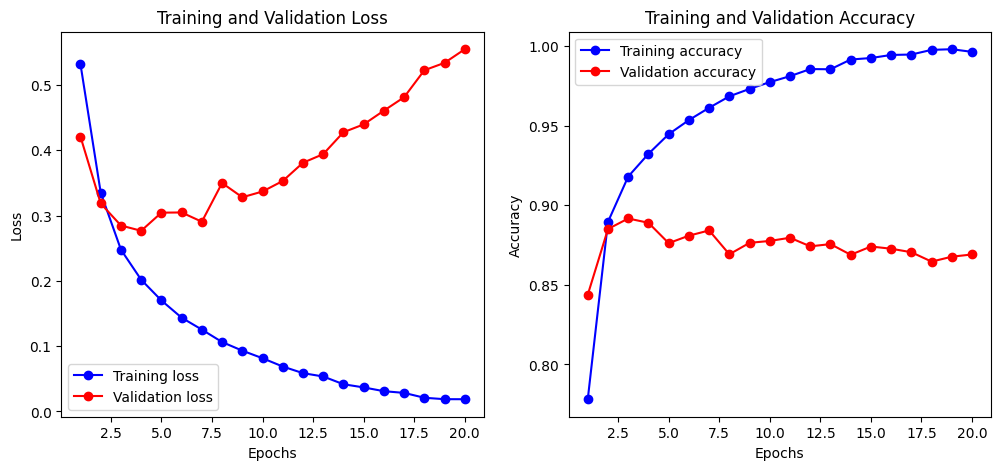

In [ ]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)
plt.figure(figsize=(12,5))
#Loss
plt.subplot(1,2,1)
plt.plot(epochs, history_dict['loss'],'b-o',label='Training loss')
plt.plot(epochs, history_dict['val_loss'],'r-o',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, history_dict['accuracy'],'b-o',label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'],'r-o',label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
results = model.evaluate(x_test, y_test)
print('Loss:',results[0])
print('Accuracy:',results[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8543 - loss: 0.6107
Loss: 0.5945597887039185
Accuracy: 0.8586400151252747


In [ ]:
word_index = imdb.get_word_index()

new_review = 'The movie was bad'

def review_to_sequence(review, word_index, num_words=10000):
  sequence=[]
  for word in review.lower().split():
    index = word_index.get(word,2) # 2 = unknown word
    if index < num_words:
      sequence.append(index)
  return sequence

sequence = review_to_sequence(new_review, word_index)
x_new = vectorize_sequences([sequence])



1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
prediction = model.predict(x_new)[0][0]
print('Prediction probability:',prediction)
print('Sentiment:', 'Postivite' if prediction > 0.5 else 'Negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction probability: 0.6214497
Sentiment: Postivite


In [ ]:
# try with the dataset of reuters newswires